In [1]:
# Data related libraries
import numpy as np
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from IPython.display import display, HTML
# Convenient helpers
from copy import copy
from time import time
from collections import defaultdict, Counter
from sklearn.preprocessing import minmax_scale
# Printing libraries and settings
# import warnings; warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format','{0:.2f}'.format)
%matplotlib inline

In [2]:
# Laden der Daten
data  = pd.read_csv('../data/gntm.csv')
data.head()

,Staffel,Teilnehmerin,Platzierung,Alter,Größe (cm),Haarfarbe,Augenfarbe,Hautfarbe,Brustumfang (cm),Taillenumfang (cm),Hüftumfang (cm),Kleidergröße,Schuhgröße
0,1,Lena Gercke,1.00,17,178.00,blond,blau,hell,90.00,62.00,90.00,36.00,39.00
1,1,Yvonne Schröder,2.00,17,174.00,blond,blau,hell,nan,nan,nan,nan,nan
2,1,Jennifer Wanderer,3.00,17,178.00,braun,NaN,hell,nan,nan,nan,nan,nan
3,1,Janina Ortmann,4.00,20,173.00,blond,grün,hell,85.00,59.00,89.00,nan,40.00
4,1,Lena Meier,5.00,20,180.00,braun,grün,hell,83.00,61.00,89.00,36.00,40.00


In [58]:
# Basisinfos über die Daten
data.describe()

,Staffel,Platzierung,Alter,Größe (cm),Brustumfang (cm),Taillenumfang (cm),Hüftumfang (cm),Kleidergröße,Schuhgröße
count,277.00,276.00,277.00,251.00,132.00,132.00,132.00,57.00,77.00
mean,7.77,11.40,19.04,176.91,84.38,63.29,90.38,35.19,39.36
std,3.64,6.78,2.21,3.23,3.82,3.08,3.55,1.06,1.14
min,1.00,1.00,16.00,169.00,71.00,56.00,80.00,32.00,36.00
25%,5.00,6.00,17.00,175.00,82.00,61.00,89.00,34.00,39.00
50%,8.00,11.00,19.00,177.00,84.00,63.00,90.00,36.00,39.00
75%,11.00,16.00,20.00,179.00,87.00,65.00,93.00,36.00,40.00
max,13.00,29.00,25.00,187.00,98.00,72.00,98.00,36.00,42.00


In [3]:
# "Proportionen" könnten interessant sein
# HB = Hüftumfang / Brustumfang
# TB = Taillenumfang / Brustumfang
# HT = Hüftumfang / Taillenumfang
# GM = Geometrisches Mittel
from scipy.stats import gmean

data['HB'] = data['Hüftumfang (cm)'] / data['Brustumfang (cm)']
data['TB'] = data['Taillenumfang (cm)'] / data['Brustumfang (cm)']
data['TH'] = data['Taillenumfang (cm)'] / data['Hüftumfang (cm)']
data['GM'] = gmean(data[['Brustumfang (cm)','Taillenumfang (cm)','Hüftumfang (cm)']], axis=1)
data.head()

,Staffel,Teilnehmerin,Platzierung,Alter,Größe (cm),Haarfarbe,Augenfarbe,Hautfarbe,Brustumfang (cm),Taillenumfang (cm),Hüftumfang (cm),Kleidergröße,Schuhgröße,HB,TB,TH,GM
0,1,Lena Gercke,1.00,17,178.00,blond,blau,hell,90.00,62.00,90.00,36.00,39.00,1.00,0.69,0.69,79.49
1,1,Yvonne Schröder,2.00,17,174.00,blond,blau,hell,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,1,Jennifer Wanderer,3.00,17,178.00,braun,NaN,hell,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,1,Janina Ortmann,4.00,20,173.00,blond,grün,hell,85.00,59.00,89.00,nan,40.00,1.05,0.69,0.66,76.42
4,1,Lena Meier,5.00,20,180.00,braun,grün,hell,83.00,61.00,89.00,36.00,40.00,1.07,0.73,0.69,76.67


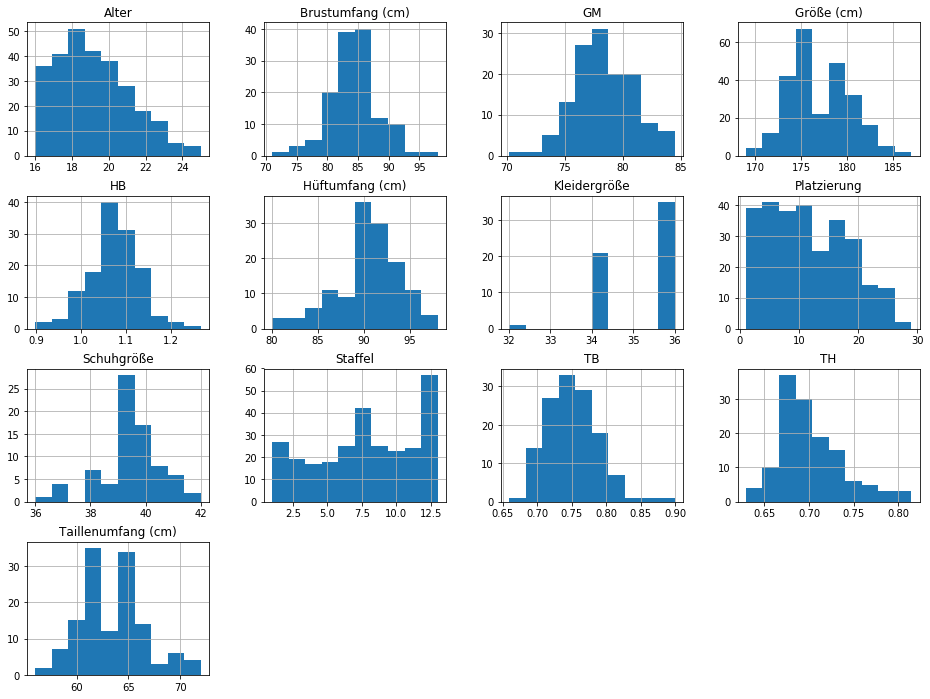

In [60]:
# Basishistogramme
data.hist(figsize=(16,12), bins=10);

In [7]:
# Berechne Lebenszeit
episoden = data.groupby('Staffel').count()['Platzierung'][data['Staffel']]
episoden.index = data.index
data['Lebenszeit'] = episoden - data['Platzierung'] + 1